<a href="https://colab.research.google.com/github/sujiraa/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Normalization-Standardization

https://scikit-learn.org/stable/modules/preprocessing.html

In [2]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ใช้ Data กรมอุตุ

In [9]:
weather_data = pd.read_excel('/content/drive/MyDrive/data/data อุตุ/Group4_ณัฐกรณ์_ภัทราวดี_ศศิวิมล_สุจิรา.xlsx')

In [11]:
data_features = weather_data.iloc[:,4:-1]
data_features.head()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณฝน,ปริมาณเมฆ
0,3.0,1005.47,27.6,9.0,24.2,83,1.4,9.0
1,2.0,1006.65,25.6,10.0,24.0,92,17.7,10.0
2,3.0,1007.49,25.6,10.0,22.9,86,3,10.0
3,2.0,1008.28,25.8,8.0,21.9,80,0,8.0
4,2.0,1009.88,24.3,10.0,21.7,86,2.2,10.0


In [13]:
data_features.shape

(8169, 8)

In [15]:
data_features.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณเมฆ
count,8113.000000,8169.000000,8169.000000,7838.000000,8169.000000,8169.000000,7838.000000
mean,2.322569,1013.111413,24.755013,3.299566,17.915204,69.305178,3.299566
std,1.311215,3.242448,2.843517,2.367818,3.819495,9.028821,2.367818
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000
25%,1.000000,1011.040000,23.100000,1.000000,15.500000,63.000000,1.000000
50%,2.000000,1012.890000,25.200000,3.000000,18.200000,69.000000,3.000000
75%,3.000000,1015.120000,26.900000,5.000000,20.800000,74.000000,5.000000
max,11.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,10.000000


In [14]:
data_features.dtypes

ความเร็วลม            float64
ความกด                float64
อุณหภูมิตุ้ม          float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิจุดต่ำสุด     float64
ความชื้น                int64
ปริมาณฝน               object
ปริมาณเมฆ             float64
dtype: object

In [ ]:
data_features[data_features['ปริมาณฝน'].eq('T')] #แสดงค่า - ที่มีในตาราง ค่าที่เราต้องการ

In [ ]:
data_features[data_features.eq('-').any(1)] #เลือกเฉลาะไม่ผ่านเกณท์

In [33]:
data_features_d =data_features[data_features.eq('-').any(1)==False] #ลบค่าที่มี -
data_features_d .shape

(5988, 8)

In [43]:
data_features_d =data_features_d[data_features_d.eq('T').any(1)==False]
data_features_d.shape

(5778, 8)

แปลงให้เป็นตัวเลข

In [44]:
data_features_d['ความเร็วลม']= data_features['ความเร็วลม'].astype(float)
data_features_d['ปริมาณเมฆ']= data_features['ปริมาณเมฆ'].astype(float)
data_features_d['ความกด']= data_features['ความกด'].astype(float)
data_features_d['อุณหภูมิตุ้ม']= data_features['อุณหภูมิตุ้ม'].astype(float)
data_features_d['อุณหภูมิจุดน้ำค้าง']= data_features['อุณหภูมิจุดน้ำค้าง'].astype(float)
data_features_d['อุณหภูมิจุดต่ำสุด']= data_features['อุณหภูมิจุดต่ำสุด'].astype(float)

In [45]:
data_features_d.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณเมฆ
count,5729.000000,5778.000000,5778.000000,5558.000000,5778.000000,5778.000000,5558.000000
mean,2.253273,1012.970076,24.809934,3.323678,17.981014,69.410869,3.323678
std,1.223140,3.234548,2.790382,2.447090,3.762340,9.438618,2.447090
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000
25%,1.000000,1010.960000,23.200000,1.000000,15.600000,63.000000,1.000000
50%,2.000000,1012.765000,25.300000,3.000000,18.100000,68.000000,3.000000
75%,3.000000,1014.967500,26.900000,5.000000,20.800000,75.000000,5.000000
max,10.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,10.000000


In [49]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[9,9]

In [ ]:
pd.plotting.scatter_matrix(data_features_d);

In [52]:
from matplotlib import pyplot as plt

(array([  26.,  139.,  467., 1275., 1798., 1190.,  590.,  228.,   54.,
          11.]),
 array([1002.07 , 1004.434, 1006.798, 1009.162, 1011.526, 1013.89 ,
        1016.254, 1018.618, 1020.982, 1023.346, 1025.71 ]),
 <a list of 10 Patch objects>)

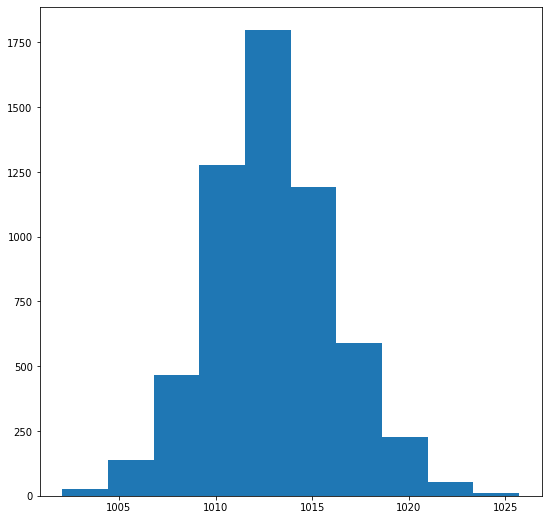

In [53]:
plt.hist(data_features_d['ความกด'])

# StandardScaler

In [51]:
from sklearn import preprocessing

In [55]:
from pandas.core.array_algos.replace import Scalar
#define บอกวิธีการที่จะทำ
scalar = preprocessing.StandardScaler()
#train สร้างโมเดลจากdata
scalar.fit(data_features_d)
#predict นำมาใชช้งาน ถ้าไม่ได้นำไปทำนายdata ใหม่เรียก transform
data_features_d_s = scalar.fit_transform(data_features_d)# ค่าเดิมแต่ปรับให้เป็น standard

In [56]:
data_features_d_s

array([[ 0.61055332, -2.31894108,  0.9999731 , ...,  1.43986191,
         0.03033702,  2.31983008],
       [-0.20708576, -1.95409806,  0.2831634 , ...,  2.39347381,
         2.80187907,  2.72851547],
       [ 0.61055332, -1.69437929,  0.2831634 , ...,  1.75773255,
         0.30239022,  2.72851547],
       ...,
       [-1.02472484, -2.50754638,  0.5340468 , ..., -1.52693067,
        -0.20770954, -1.35833849],
       [-0.20708576, -2.22927627,  0.13980146, ..., -1.42097379,
        -0.20770954, -0.5409677 ],
       [ 0.61055332, -1.47176321,  0.2831634 , ..., -1.20906003,
        -0.20770954, -0.94965309]])

(array([1.080e+02, 3.620e+03, 1.167e+03, 5.440e+02, 2.040e+02, 6.000e+01,
        0.000e+00, 2.000e+01, 3.000e+00, 3.000e+00]),
 array([-1.84236392, -1.02472484, -0.20708576,  0.61055332,  1.4281924 ,
         2.24583148,  3.06347056,  3.88110964,  4.69874872,  5.5163878 ,
         6.33402688]),
 <a list of 10 Patch objects>)

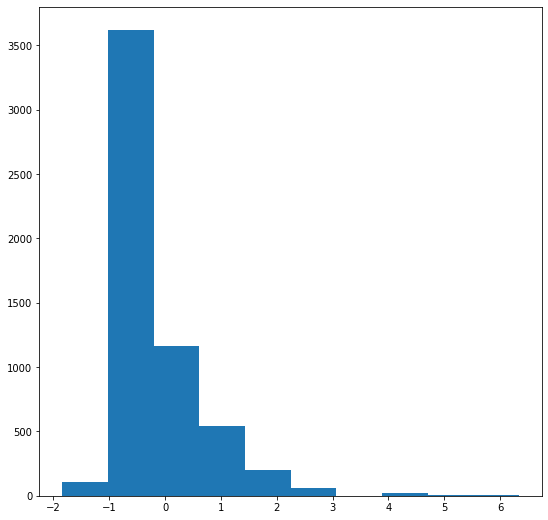

In [57]:
plt.hist(data_features_d_s[:,0]) #ใช้แถวกับหลังในการเรียกเพราะเป็น numpy

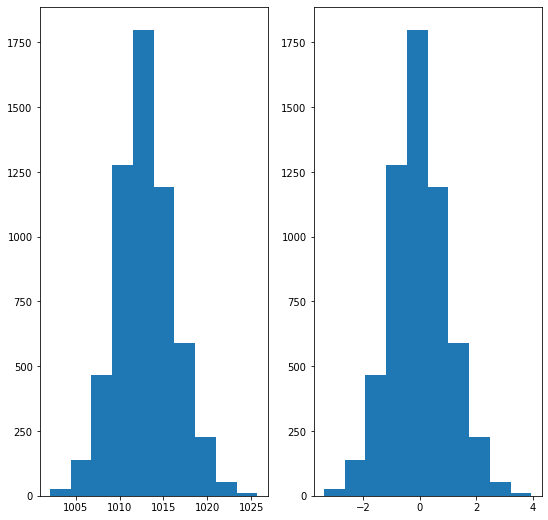

In [67]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,1]);

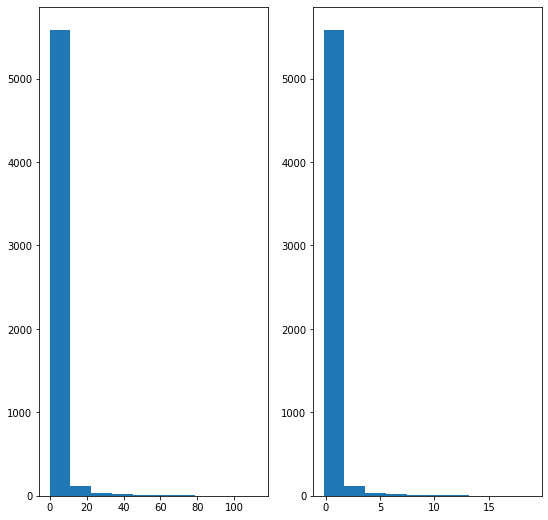

In [64]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,6]);

##Min Max normalization

In [65]:
#define บอกวิธีการที่จะทำ
scalar = preprocessing.MinMaxScaler() #ปรับขนาดให้อยู่มาตรฐานเดียวกัน
#train สร้างโมเดลจากdata
scalar.fit(data_features_d)
#predict นำมาใชช้งาน ถ้าไม่ได้นำไปทำนายdata ใหม่เรียก transform
data_features_d_norm = scalar.fit_transform(data_features_d)# ค่าเดิมแต่ปรับให้เป็น standard

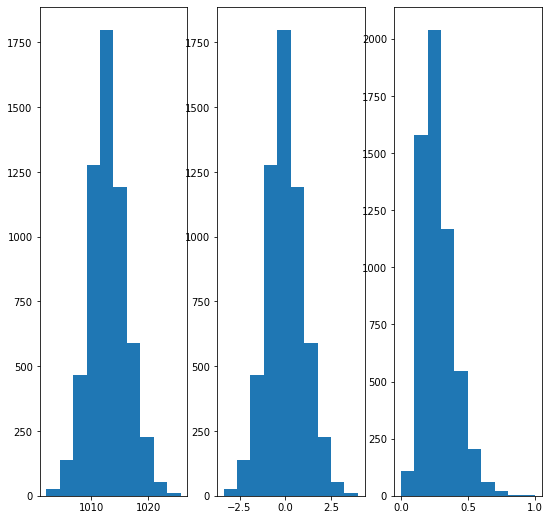

In [68]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,1]);
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]);

# Discritization

In [72]:
home_data = pd.read_csv('/content/drive/MyDrive/data/สุจิรา มันหาท้าว.csv')

In [73]:
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


# ลบ record ที่ค่า sell price เป็นค่าว่าง

In [77]:
home_data = home_data.dropna(subset=['sell_price'])

In [ ]:
plt.hist(home_data['sell_price']); #กราฟฮิสโตรเเกรม

#แปลงค่า sell price
- ราคาต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่าง 5m-10m ให้เป็น 2
- ราคา 10m ขึ้นไปให้เป็น 3

In [ ]:
home_data.head()

In [ ]:
I = home_data[['sell_price']]
I

In [91]:
home_data[home_data['sell_price']<5000000]=1 #มันจะทับค่าเดิมทำให้แก้ไขยาก

In [ ]:
home_data

# One-Hot encoder

In [95]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [96]:
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,d21250-7/11,d1500-7/11,zone_1,zone_กลางเมือง-เมืองเก่า-กุดกว้าง,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,2,3,0,0,0,0,0,0,1,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,10,14,0,0,0,0,1,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,4,9,0,0,0,0,0,0,1,0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
